<h1 style="color:blue;">Лабораторная №1</h1>
<h3 style="color:red;">ПРИМЕЧАНИЕ.</h3>
<h3>Для этой лабораторной работы вам нужна подвыборка с 3-5<br>
случайными величинами, по крайней мере, половина из них должна быть<br>
представлена непрерывными случайными величинами.</h3>
<br>
<p><u>Шаг 1.</u> Выберите подвыборку с основными переменными для дальнейшего анализа. Затем для каждой из
них:

<u>Шаг 2.</u> Вам необходимо сделать непараметрическую оценку плотности распределения в виде
гистограммы и используя функцию плотности ядра (или закона вероятности в случае дискретной СВ).

<u>Шаг 3.</u> Вам необходимо провести оценку порядковых статистик и представить их в виде “ящиков с усами”.

<u>Шаг 4.</u> Найдите одно или несколько теоретических распределений, которые могли бы описать вашу
выборку на основе результатов непараметрического анализа.

<u>Шаг 5.</u> Оценить параметры выбранных распределений, используя методы максимального правдоподобия
и метод наименьших квадратов.

<u>Шаг 6.</u> Проверьте оцененные параметры с помощью графика квантиль-квантиль (QQ).

<u>Шаг 7.</u> Оценить достоверность подогнанных распределений, используя не менее 2 статистических тестов.

<u>Шаг 8.</u> Используя одномерные параметрические распределения, которые были подобраны, выполните
семплирование СВ. Используйте для этого не менее 2 различных методов семплирования.</p>

In [78]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

import scipy
import inspect
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [151]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## ШАГ 1
<p style="color:#ab1f2a;">Выберите подвыборку с основными переменными для дальнейшего анализа.

Требованиями данной лабораторной работы установлено, что необходимо отобрать <b>3-5 случайных величин</b>.<br>
Для выполнения работы возьмем 4 фичи: <p style="color:blue;"><b>fixed acidity</b>, <b>residual sugar</b>, <b>chlorides</b>, <b>density</b>.

In [152]:
df = df[['pH', 'sulphates', 'chlorides', 'density']]
df

,pH,sulphates,chlorides,density
0,3.51,0.56,0.076,0.99780
1,3.20,0.68,0.098,0.99680
2,3.26,0.65,0.092,0.99700
3,3.16,0.58,0.075,0.99800
4,3.51,0.56,0.076,0.99780
...,...,...,...,...
1594,3.45,0.58,0.090,0.99490
1595,3.52,0.76,0.062,0.99512
1596,3.42,0.75,0.076,0.99574
1597,3.57,0.71,0.075,0.99547


## ШАГ 2
<p style="color:#ab1f2a;">Вам необходимо сделать непараметрическую оценку плотности распределения в виде гистограммы и используя функцию плотности ядра (или закона вероятности в случае дискретной СВ).



In [75]:
def tails_cutting(values):
    Q3, Q1 = np.percentile(values, [75, 25])
    return [val for val in values if val < Q3 + 1.5 * (Q3 - Q1) and val > Q1 - 1.5 * (Q3 - Q1)]

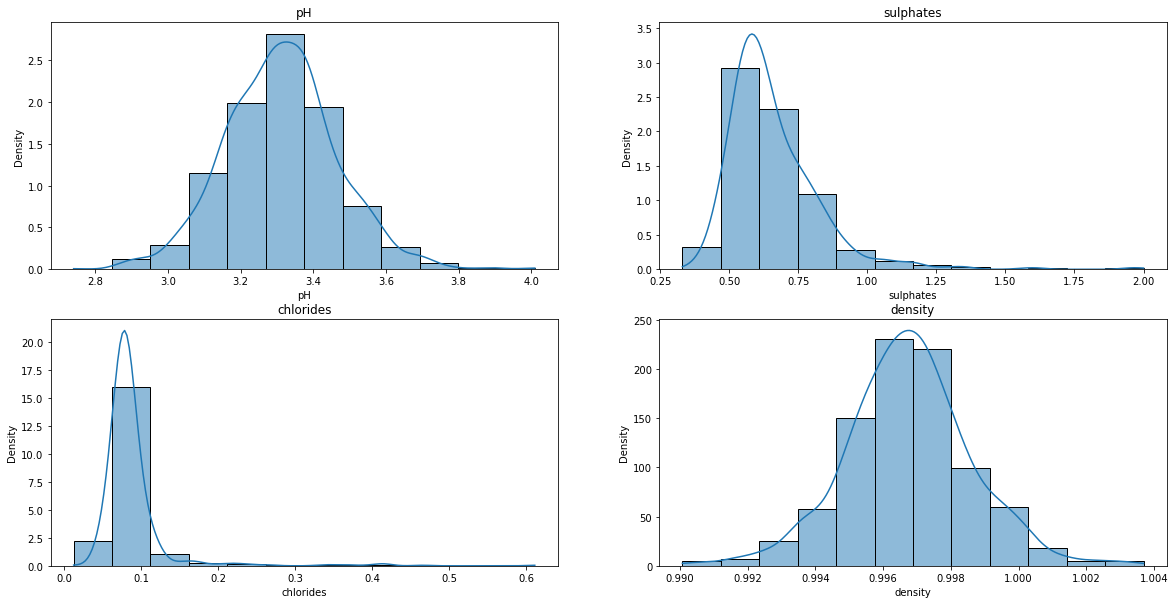

In [153]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))

for i in range(df.columns.shape[0] // 2):
    for j in range(df.columns.shape[0] // 2):
        sns.histplot(df[df.columns[int(str(i)+str(j), 2)]], \
                     ax=ax[i, j], \
                     kde=True, \
                     stat='density',
                     bins=round(1 + 3.32 * math.log(len(df[df.columns[int(str(i)+str(j), 2)]]), 10))).set_title(df.columns[int(str(i)+str(j), 2)])
        
plt.show()

## ШАГ 3
<p style="color:#ab1f2a;">Вам необходимо провести оценку порядковых статистик и представить их в виде “ящиков с усами”.

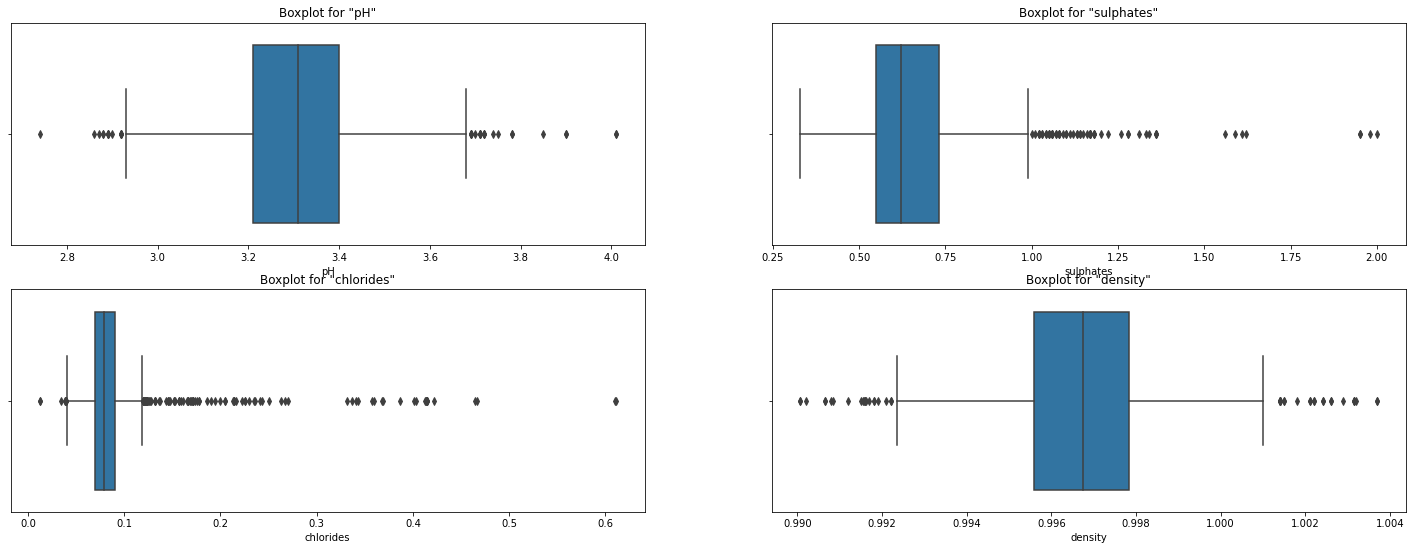

In [195]:
figure, ax = plt.subplots(2, 2, figsize=(25, 9))

for i in range(df.columns.shape[0] // 2):
    for j in range(df.columns.shape[0] // 2):
        sns.boxplot(df[df.columns[int(str(i)+str(j), 2)]], \
                    ax=ax[i, j]).set_title(f'Boxplot for "{df.columns[int(str(i)+str(j), 2)]}"')

In [196]:
print('______________')
print()
for col in df.columns:
    print(f'Порядковые статистики для СВ: {col}')
    print(pd.Series(df[col]).describe()[3:])
    print('______________')
    print()

______________

Порядковые статистики для СВ: pH
min    2.74
25%    3.21
50%    3.31
75%    3.40
max    4.01
Name: pH, dtype: float64
______________

Порядковые статистики для СВ: sulphates
min    0.33
25%    0.55
50%    0.62
75%    0.73
max    2.00
Name: sulphates, dtype: float64
______________

Порядковые статистики для СВ: chlorides
min    0.012
25%    0.070
50%    0.079
75%    0.090
max    0.611
Name: chlorides, dtype: float64
______________

Порядковые статистики для СВ: density
min    0.990070
25%    0.995600
50%    0.996750
75%    0.997835
max    1.003690
Name: density, dtype: float64
______________



## ШАГ 4
<p style="color:#ab1f2a;">Найдите одно или несколько теоретических распределений, которые могли бы описать вашу выборку на основе результатов непараметрического анализа.

In [60]:
def kolmogorov_smirnov_test(random_value, distribution_name, distribution_func, N=100):
    params = distribution_func.fit(random_value)
    return scipy.stats.kstest(random_value, distribution_name, params, N=N).pvalue

def get_optimal_distribution(random_value):
    bad_dists = ['levy_stable', 'studentized_range']
    
    distributions = inspect.getmembers(scipy.stats._continuous_distns)[12][1]
    pvalues = []
    
    for dist in tqdm(distributions):
        try:
            if dist not in bad_dists:
                test_result = kolmogorov_smirnov_test(random_value, dist, 
                                                      getattr(scipy.stats._continuous_distns, dist))
        except Exception as e:
            test_result = -1
        
        pvalues.append(test_result)
        
    return distributions[pvalues.index(max(pvalues))], max(pvalues)



In [158]:
for col in df.columns:
    if col == 'residual sugar':
        print(f'Оптимальное теоретическое распределение для {col}: {get_optimal_distribution(tails_cutting(df[col].values))}')
    else:
        print(f'Оптимальное теоретическое распределение для {col}: {get_optimal_distribution(df[col].values)}')

  0%|          | 0/206 [00:00<?, ?it/s]

Оптимальное теоретическое распределение для pH: ('t', 0.32172897832975733)


  0%|          | 0/206 [00:00<?, ?it/s]

Оптимальное теоретическое распределение для sulphates: ('burr12', 0.2859962111043042)


  0%|          | 0/206 [00:00<?, ?it/s]

Оптимальное теоретическое распределение для chlorides: ('johnsonsu', 0.1527773243994479)


  0%|          | 0/206 [00:00<?, ?it/s]

Оптимальное теоретическое распределение для density: ('dweibull', 0.8097888346598463)


In [345]:
def dist_params(random_value, distribution_name):
    distribution = getattr(scipy.stats._continuous_distns, distribution_name)
    params = distribution.fit(random_value)
    return(params)

def dist_plot(data, column, distribution_name, ml_params, ls_params):
    distribution = getattr(scipy.stats._continuous_distns, distribution_name)

    plt.figure(figsize=(10, 2))
    x_axis = np.linspace(np.min(data[column]), np.max(data[column]))

    plt.plot(x_axis, distribution.pdf(x_axis, *ml_params), label='ММП', color='red')
    plt.plot(x_axis, distribution.pdf(x_axis, *ls_params), label='МНК', color='black', linestyle=':')
    plt.title(column)
    plt.legend()
    plt.show()

In [330]:
for col, dist in zip(df.columns, ['t', 'burr12', 'johnsonsu', 'dweibull']):
    print(f'Параметры теоретического распределения {dist} для {col}:', dist_params(df[col].values, dist))
    print()

Параметры теоретического распределения t для pH: (11.140732491916324, 3.3097301361129485, 0.13981815339106113)

Параметры теоретического распределения burr12 для sulphates: (32.95173273335834, 0.30282409870973015, -0.7189218839835758, 1.2529952377605698)

Параметры теоретического распределения johnsonsu для chlorides: (-0.43550440458228434, 0.8285968860062747, 0.07340695270168275, 0.010013396804335835)

Параметры теоретического распределения dweibull для density: (1.1508778162315112, 0.9967306720345006, 0.00150552265956371)



## ШАГ 5
<p style="color:#ab1f2a;">Оценить параметры выбранных распределений, используя методы максимального правдоподобия и метод наименьших квадратов.

In [346]:
def LS(params):
    distribution_name, data, col = 't', df, 'pH'
    distribution = getattr(scipy.stats._continuous_distns, distribution_name)
    return abs((distribution.ppf(np.arange(0,1,0.05), *params)[1:]) - np.quantile(data[col], np.arange(0,1,0.05))[1:]).sum()
  
result = scipy.optimize.least_squares(LS, (11.140732491916324, 3.3097301361129485, 0.13981815339106113))
result.x

array([11.14073262,  3.3097689 ,  0.13929705])

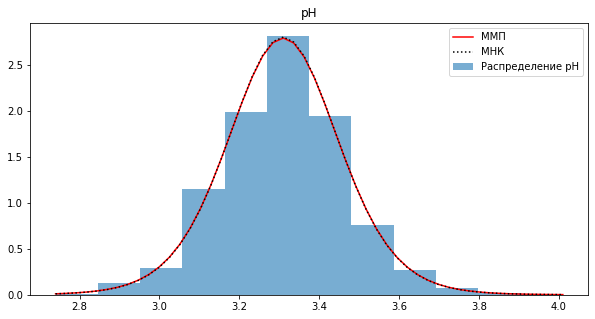

In [332]:
dist_plot(data=df,
          column='pH',
          distribution_name='t',
          ml_params=(11.140732491916324, 3.3097301361129485, 0.13981815339106113),
          ls_params=result.x)

In [333]:
def LS(params):
    distribution_name, data, col = 'burr12', df, 'sulphates'
    distribution = getattr(scipy.stats._continuous_distns, distribution_name)
    return abs((distribution.ppf(np.arange(0,1,0.05), *params)[1:]) - np.quantile(data[col], np.arange(0,1,0.05))[1:]).sum()
  
result = scipy.optimize.least_squares(LS, (32.95173273335834, 0.30282409870973015, -0.7189218839835758, 1.2529952377605698))
result.x

array([32.95173326,  0.30304943, -0.7194964 ,  1.2524133 ])

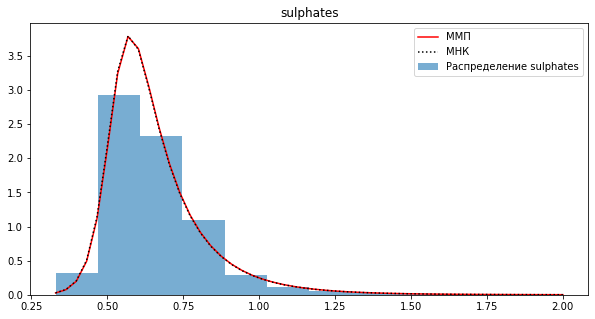

In [334]:
dist_plot(data=df,
          column='sulphates',
          distribution_name='burr12',
          ml_params=(32.95173273335834, 0.30282409870973015, -0.7189218839835758, 1.2529952377605698),
          ls_params=result.x)

In [335]:
def LS(params):
    distribution_name, data, col = 'johnsonsu', df, 'chlorides'
    distribution = getattr(scipy.stats._continuous_distns, distribution_name)
    return abs((distribution.ppf(np.arange(0,1,0.05), *params)[1:]) - np.quantile(data[col], np.arange(0,1,0.05))[1:]).sum()
  
result = scipy.optimize.least_squares(LS, (-0.43550440458228434, 0.8285968860062747, 0.07340695270168275, 0.010013396804335835))
result.x

array([-0.4354897 ,  0.82862121,  0.07310144,  0.00937933])

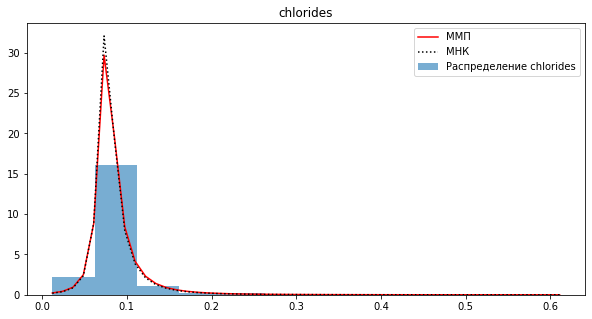

In [336]:
dist_plot(data=df,
          column='chlorides',
          distribution_name='johnsonsu',
          ml_params=(-0.43550440458228434, 0.8285968860062747, 0.07340695270168275, 0.010013396804335835),
          ls_params=result.x)

In [337]:
def LS(params):
    distribution_name, data, col = 'dweibull', df, 'density'
    distribution = getattr(scipy.stats._continuous_distns, distribution_name)
    return abs((distribution.ppf(np.arange(0,1,0.05), *params)[1:]) - np.quantile(data[col], np.arange(0,1,0.05))[1:]).sum()
  
result = scipy.optimize.least_squares(LS, (1.1508778162315112, 0.9967306720345006, 0.00150552265956371))
result.x

array([1.1508778 , 0.99674962, 0.0015269 ])

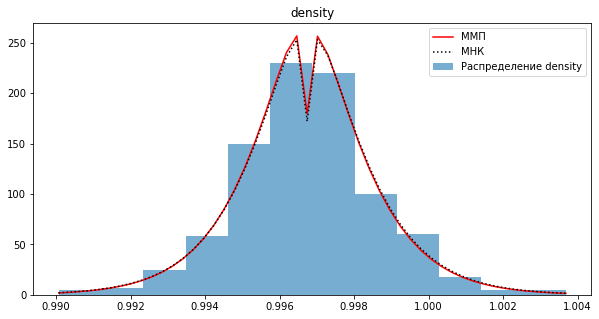

In [338]:
dist_plot(data=df,
          column='density',
          distribution_name='dweibull',
          ml_params=(1.1508778162315112, 0.9967306720345006, 0.00150552265956371),
          ls_params=result.x)

## ШАГ 6
<p style="color:#ab1f2a;">Проверьте оцененные параметры с помощью графика квантиль-квантиль (QQ).

In [339]:
def quantile_biplot(data, column, distribution_name, params_ML, params_MNK):
    distribution = getattr(scipy.stats._continuous_distns, distribution_name)

    percs = np.linspace(0, 100, 11)
    qn_first = np.percentile(data[column], percs)
    params_ML = params_ML
    qn_distr__ML  = distribution.ppf(percs / 100.0, *params_ML)

    params_MNK = params_MNK
    qn_distr__MNK  = distribution.ppf(percs / 100.0, *params_MNK)

    x = np.linspace(np.min(data[column]), np.max(data[column]))
    plt.figure(figsize=(10, 10))
    plt.plot(qn_first, qn_distr__ML, ls="", marker="o", markersize=8, label = 'ML', alpha=1, color='blue')
    plt.plot(qn_first, qn_distr__MNK, ls="", marker="o", markersize=8, label = 'LS', alpha=0.6, color='pink')
    plt.plot(x, x, color="k", ls="--")

    plt.xlabel(f'Empirical distribution')
    plt.ylabel('Theoretical '+ str(distribution_name) +' distribution')
    plt.title('qq-plot для СВ ' + str(column))
    plt.legend()
    plt.show()

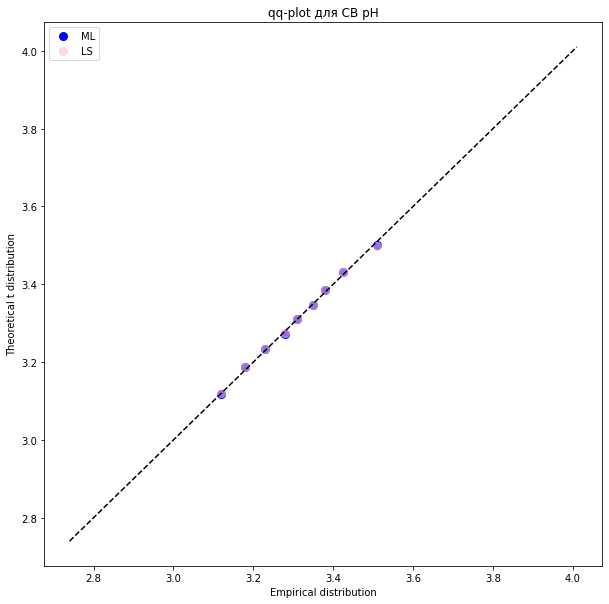

In [340]:
quantile_biplot(df, 
                'pH', 
                't', 
               (11.140732491916324, 3.3097301361129485, 0.13981815339106113),
               [11.14073262,  3.3097689 ,  0.13929705])

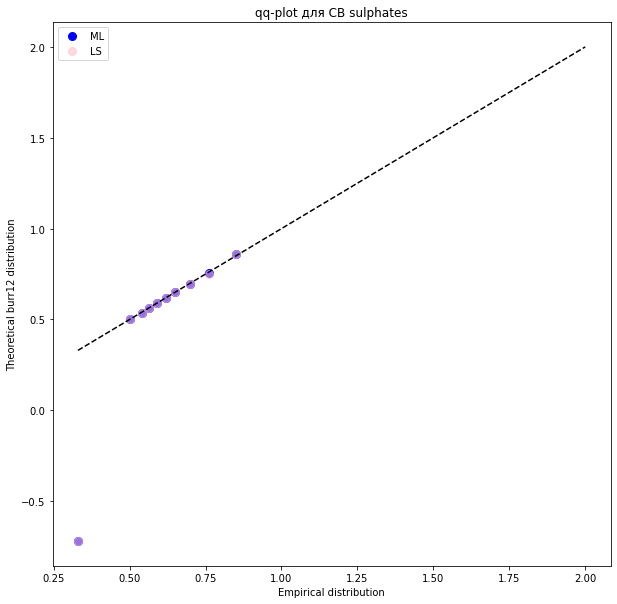

In [368]:
quantile_biplot(df, 
                'sulphates', 
                'burr12', 
               (32.95173273335834, 0.30282409870973015, -0.7189218839835758, 1.2529952377605698),
               [32.95173326,  0.30304943, -0.7194964 ,  1.2524133 ])

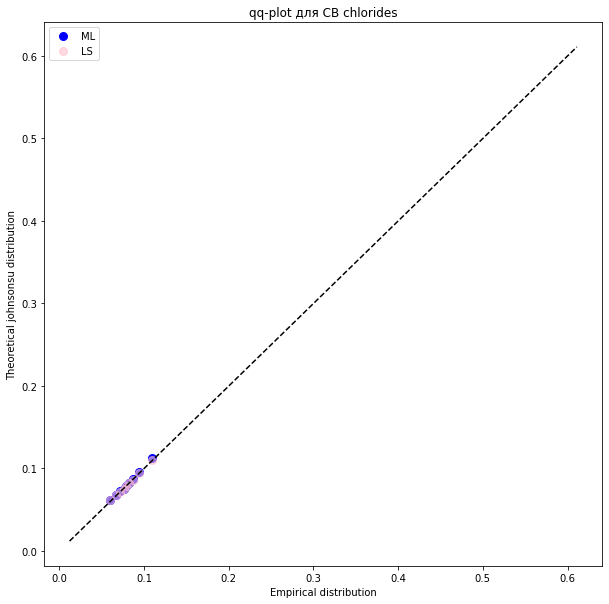

In [369]:
quantile_biplot(df, 
                'chlorides', 
                'johnsonsu', 
                (-0.43550440458228434, 0.8285968860062747, 0.07340695270168275, 0.010013396804335835),
                [-0.4354897 ,  0.82862121,  0.07310144,  0.00937933]
               )

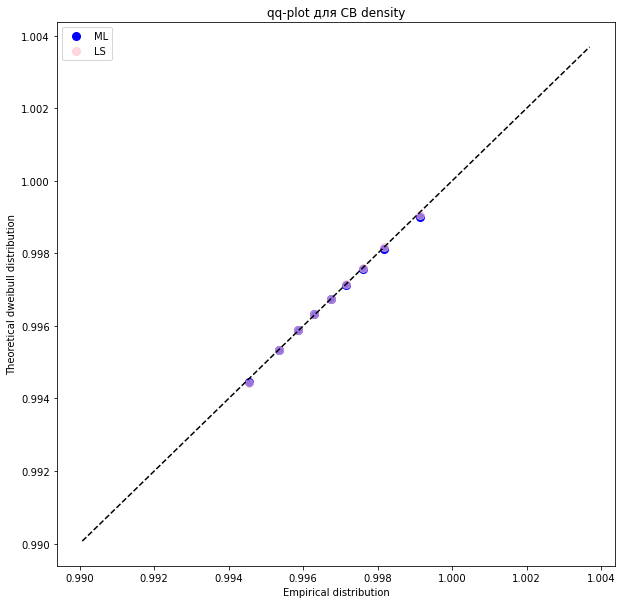

In [370]:
quantile_biplot(df, 
                'density', 
                'dweibull', 
                (1.1508778162315112, 0.9967306720345006, 0.00150552265956371),
                [1.1508778 , 0.99674962, 0.0015269 ]
               )

## ШАГ 7
<p style="color:#ab1f2a;">Оценить достоверность подогнанных распределений, используя не менее 2 статистических тестов.

In [489]:
scipy.stats.cramervonmises(df.pH, 't', (11.140732491916324, 3.3097301361129485, 0.13981815339106113))

CramerVonMisesResult(statistic=0.12148323287581075, pvalue=0.4894901416169687)

In [491]:
scipy.stats.cramervonmises(df.sulphates, 'burr12', (32.95173273335834, 0.30282409870973015, -0.7189218839835758, 1.2529952377605698))

CramerVonMisesResult(statistic=0.1649644258911282, pvalue=0.34705879593365585)

In [492]:
scipy.stats.cramervonmises(df.chlorides, 'johnsonsu', (-0.43550440458228434, 0.8285968860062747, 0.07340695270168275, 0.010013396804335835))

CramerVonMisesResult(statistic=0.28391941970627327, pvalue=0.15013891731218343)

In [493]:
scipy.stats.cramervonmises(df.density, 'dweibull', (1.1508778162315112, 0.9967306720345006, 0.00150552265956371))

CramerVonMisesResult(statistic=0.05062211442281203, pvalue=0.8725601831368486)

## ШАГ 8
<p style="color:#ab1f2a;">Используя одномерные параметрические распределения, которые были подобраны, выполните семплирование СВ. Используйте для этого не менее 2 различных методов семплирования.

In [469]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
def qqplot_samples(column, values, distribution_name, params_ML):
    distribution = getattr(scipy.stats._continuous_distns, distribution_name)

    percs = np.linspace(0, 100, 11)
    qn_first = np.percentile(values, percs)
    params_ML = params_ML
    qn_distr__ML  = distribution.ppf(percs / 100.0, *params_ML)

    x = np.linspace(np.min(values)-0.01, np.max(values)+0.01)
    plt.figure(figsize=(10, 10))
    plt.plot(qn_first, qn_distr__ML, ls="", marker="o", markersize=8)
    plt.plot(x, x, color="k", ls="--")

    plt.xlabel(f'Распределение сэмпла')
    plt.ylabel('Теоретическое '+ str(distribution_name) +' распределение')
    plt.title('qq-plot сэмплирования ' + str(column))
    plt.show()

In [462]:
def rejection_sampling(data, column, distribution_name, params, nbins, kernel_name, kernel_params, M):

    ditribution = getattr(scipy.stats._continuous_distns, distribution_name)
    x_axis = np.linspace(min(data[column]),max(data[column]))

    def f(x):
        return(ditribution.pdf(x, *params))

    def g(x):
        kernel = getattr(scipy.stats._continuous_distns, kernel_name)
        return kernel.pdf(x, *kernel_params)

    n = 10000
    samples = []
    
    for _ in range(n):
        x = np.random.normal(*kernel_params)

        prob_accept = f(x) / (M * g(x))

        if np.random.random() < prob_accept:
            samples.append(x)
    
    print(kolmogorov_smirnov_test(samples, distribution_name, getattr(scipy.stats._continuous_distns, distribution_name)))
    
    plt.figure(figsize=(20,10))

    plt.plot(x_axis, f(x_axis), label = (f'Плотность {distribution_name} распределения'))
    plt.plot(x_axis, M*g(x_axis), label = f'Плотность покрывающего {kernel_name} распределения', color='red')
    plt.hist(data[column], density=True, bins = nbins, label = f'Распределение СВ {column}', color='green')
    plt.hist(samples, density=True, alpha = 0.75, bins = round(1 + 3.32 * math.log(len(samples), 10)), label = 'Распределение сэмпла', color='pink')
    plt.legend()
    plt.title(f'Accept-reject {column}')
    plt.show()
    
    qqplot_samples(column, samples, distribution_name, params)

0.6050694471546477


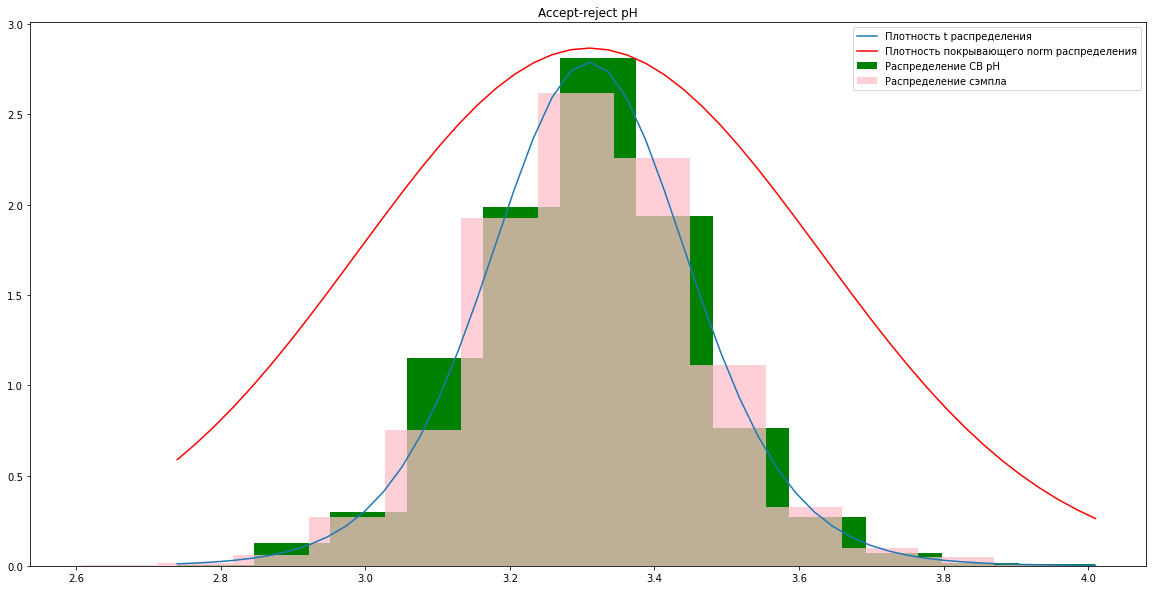

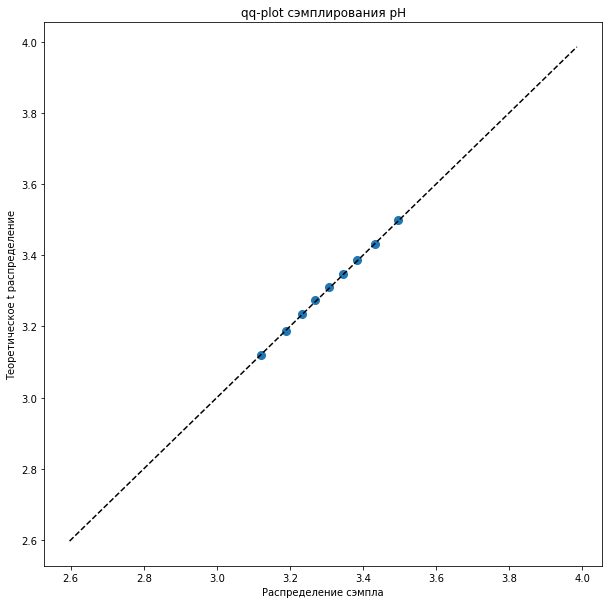

In [470]:
rejection_sampling(df, 'pH', 't', (11.140732491916324, 3.3097301361129485, 0.13981815339106113), 12, 'norm', (3.3097301361129485, 0.32), M=2.3)


0.5744865282503797


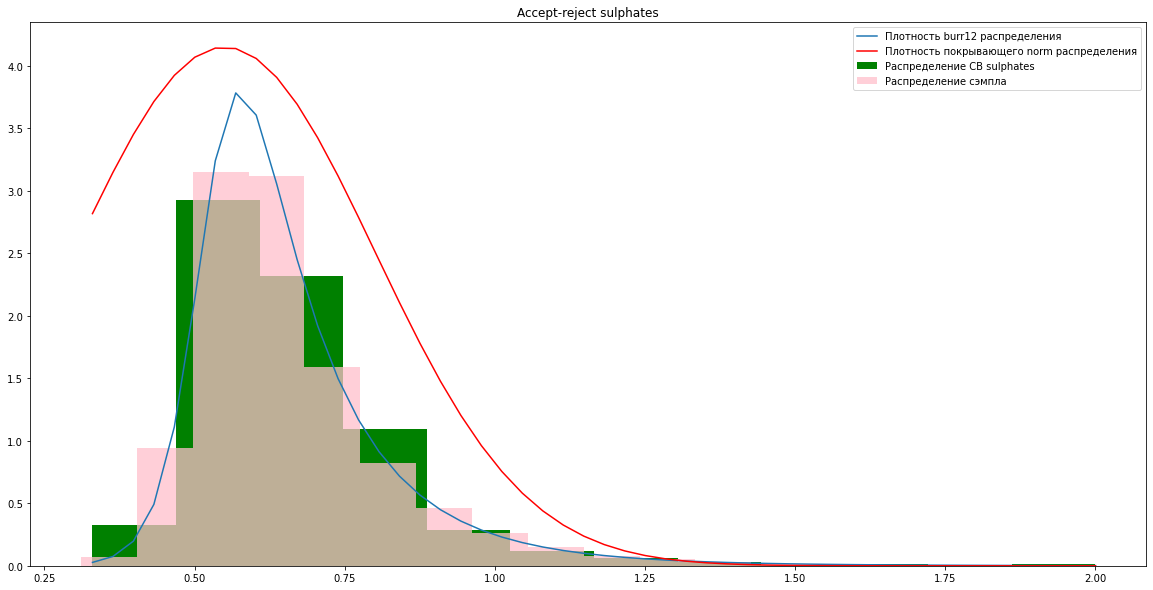

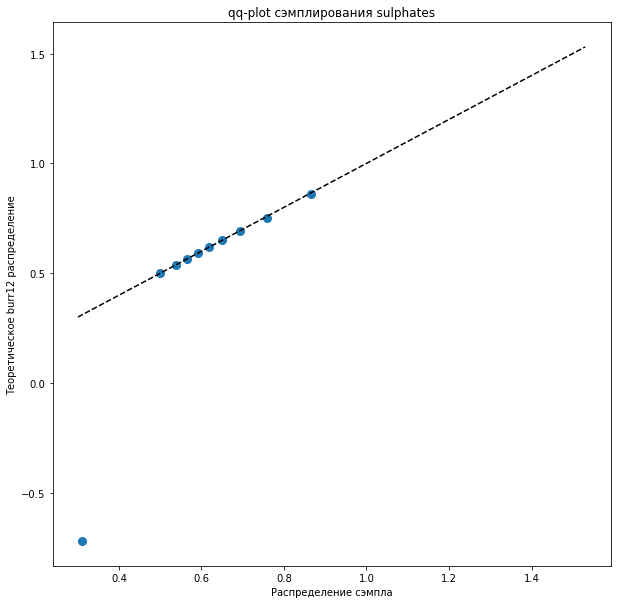

In [471]:
rejection_sampling(df, 'sulphates', 'burr12', (32.95173273335834, 0.30282409870973015, -0.7189218839835758, 1.2529952377605698), 12, 'norm', (0.55, 0.25), 2.6)


0.9665260139636123


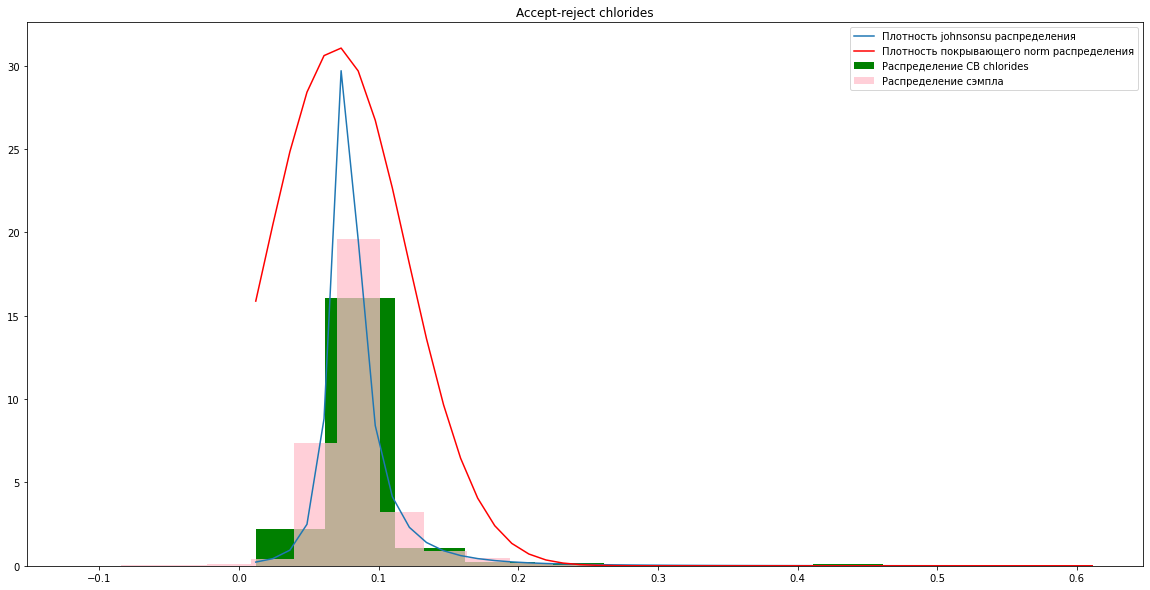

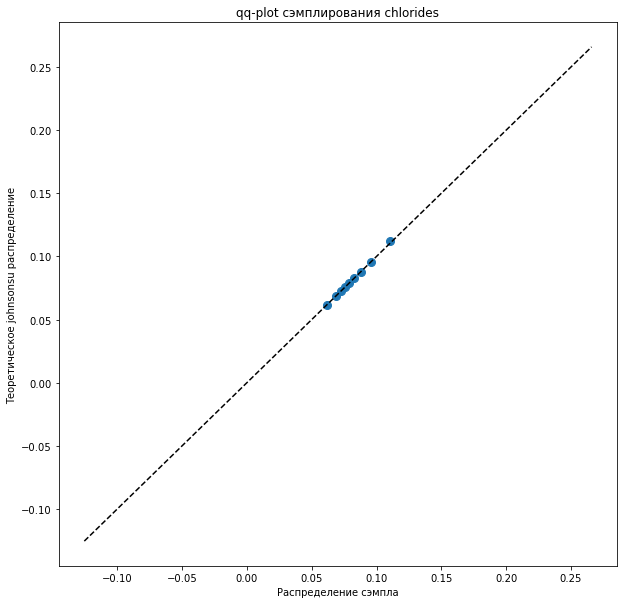

In [472]:
rejection_sampling(df, 'chlorides', 'johnsonsu', (-0.43550440458228434, 0.8285968860062747, 0.07340695270168275, 0.010013396804335835), 12, 'norm', (0.07, 0.05), 3.9)


0.2999362230921965


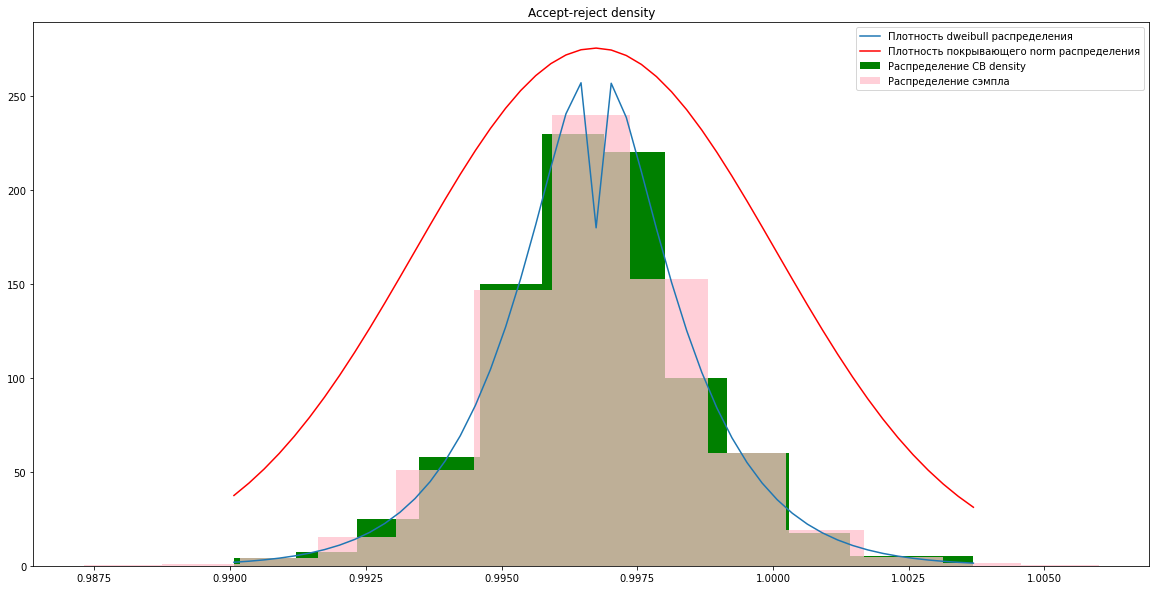

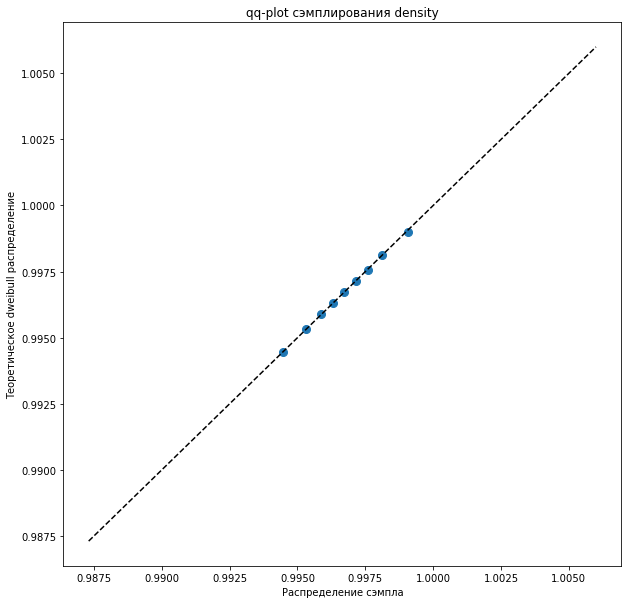

In [468]:
rejection_sampling(df, 'density', 'dweibull', (1.1508778162315112, 0.9967306720345006, 0.00150552265956371), 12, 'norm', (0.99673067, 0.01/3), 2.3)


In [479]:
def inverse_function_sampling(data, column, distribution_name, params, n_bins):
    x_axis = np.linspace(min(data[column]),max(data[column]))
    attr = getattr(scipy.stats._continuous_distns, distribution_name)

    y = attr.ppf(np.random.random_sample(1000), *params)
    
    print(kolmogorov_smirnov_test(y, distribution_name, getattr(scipy.stats._continuous_distns, distribution_name)))
    
    
    plt.figure(figsize=(20,10))
    plt.xlim(min(data[column]), max(data[column]))
    plt.plot(x_axis, attr.pdf(x_axis, *params), label = f'Плотность {distribution_name} распределения')
    plt.hist(data[column],density=True, label=f'Распределение СВ {column}',bins = n_bins, color='green')
    plt.hist(y,density=True, label='Распределение сэмпла', bins = round(1 + 3.32 * math.log(len(y), 10)), alpha=0.75, color='pink')
    plt.legend()
    plt.title('Cэмплирование методом обратной функции для ' + str(column))
    plt.show()
    
    qqplot_samples(column, y, distribution_name, params)

0.9344619950787623


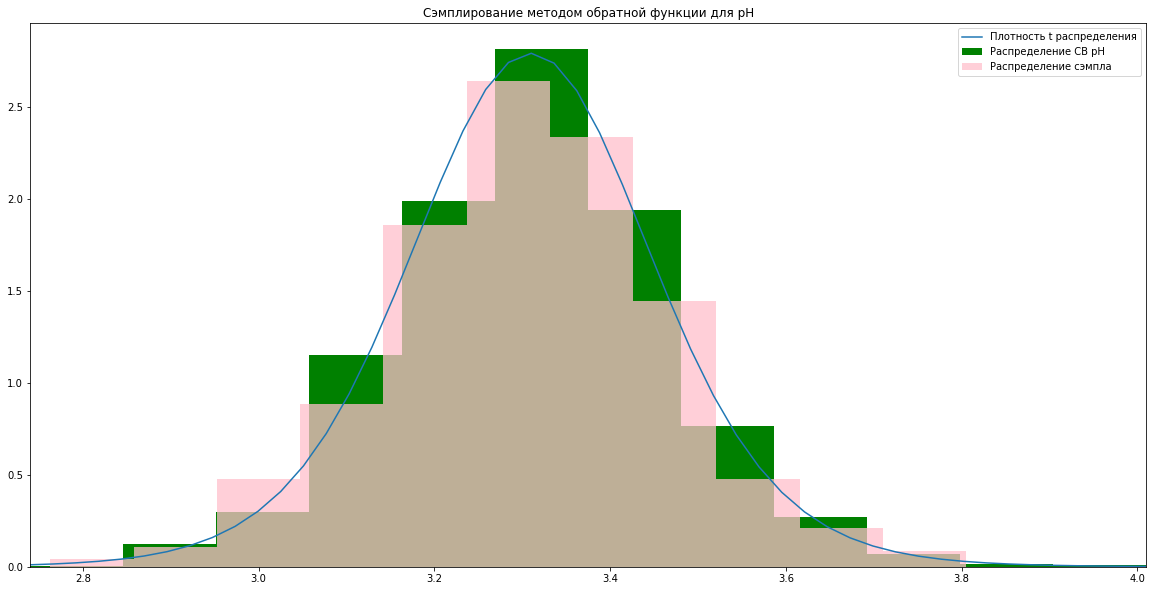

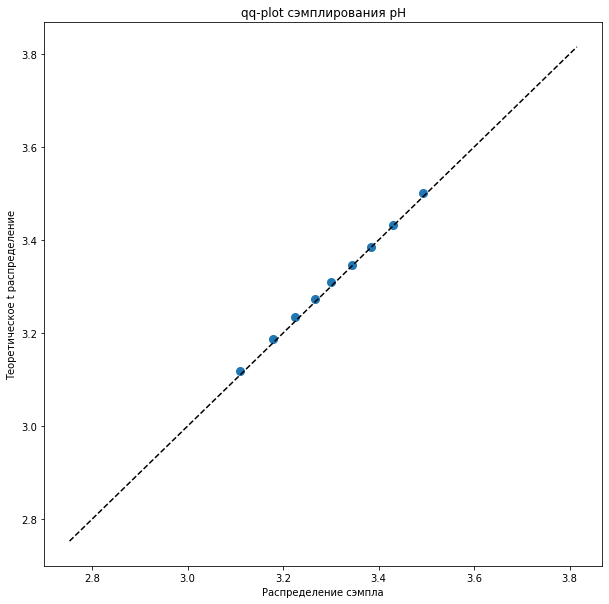

In [480]:
inverse_function_sampling(df, 'pH', 't', (11.140732491916324, 3.3097301361129485, 0.13981815339106113), 12)

0.9512348867905795


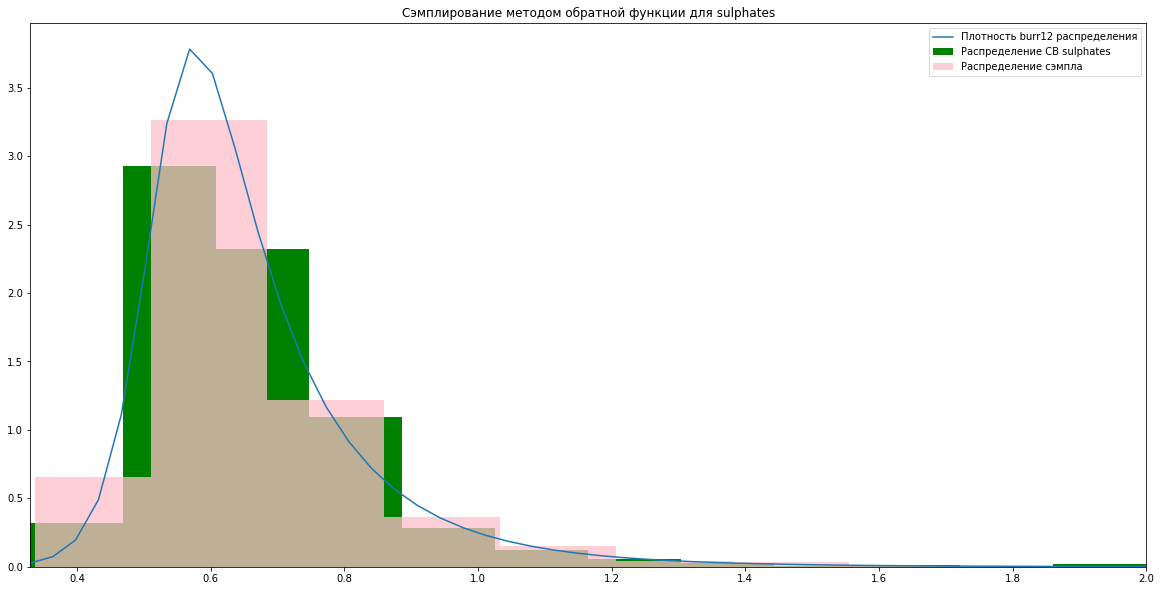

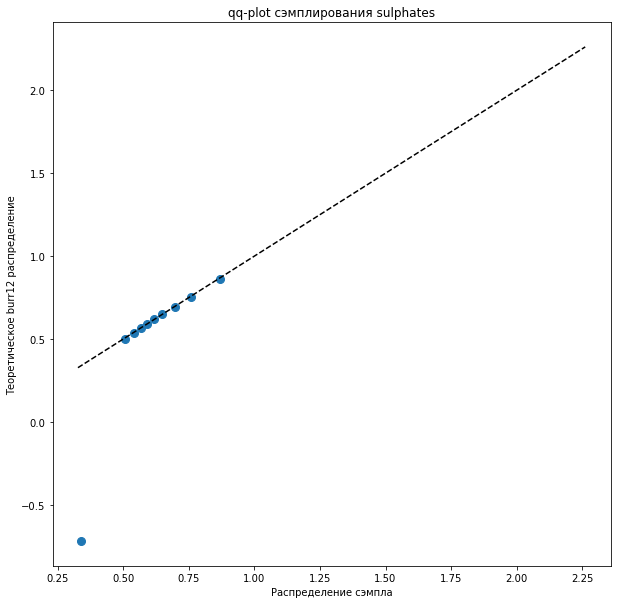

In [481]:
inverse_function_sampling(df, 'sulphates', 'burr12', (32.95173273335834, 0.30282409870973015, -0.7189218839835758, 1.2529952377605698), 12)

0.9750914833609179


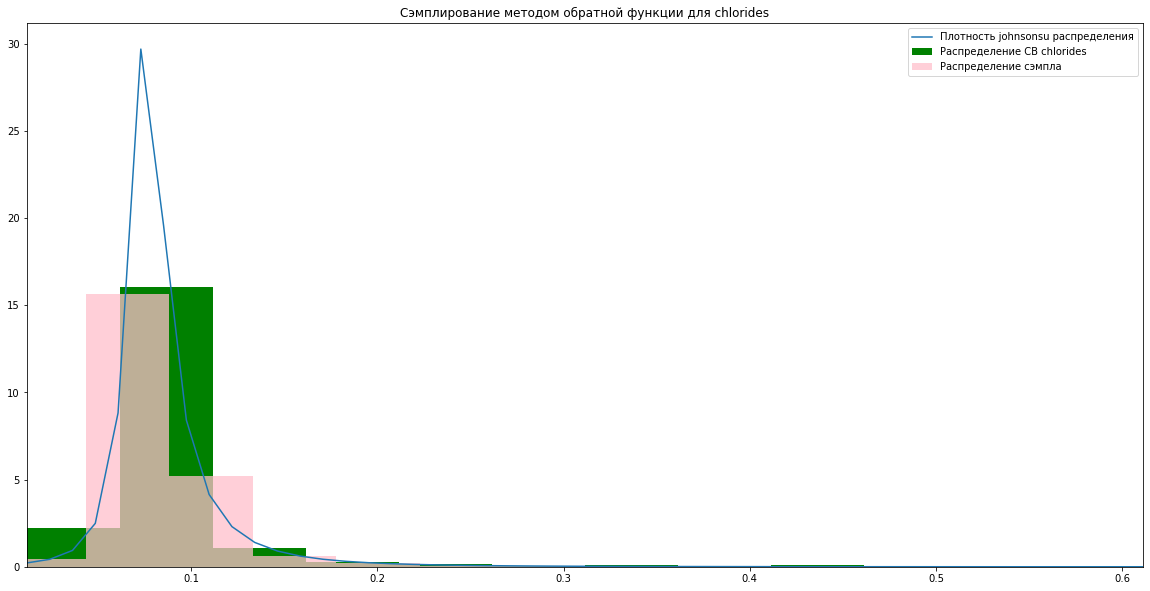

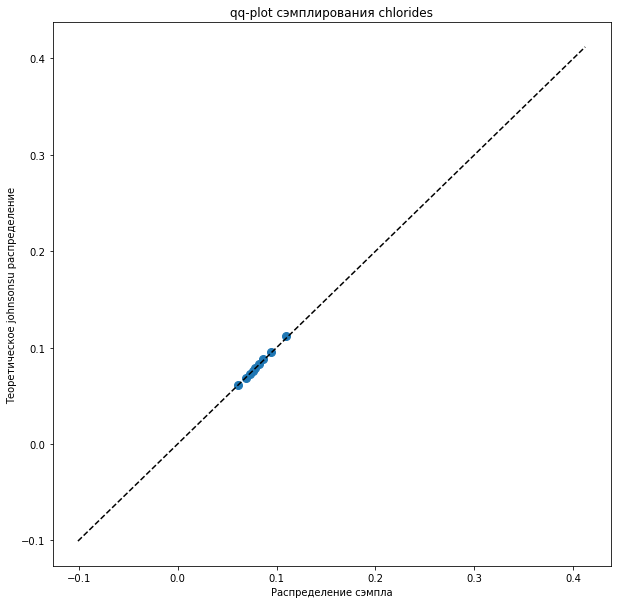

In [482]:
inverse_function_sampling(df, 'chlorides', 'johnsonsu', (-0.43550440458228434, 0.8285968860062747, 0.07340695270168275, 0.010013396804335835), 12)


0.9256678805005437


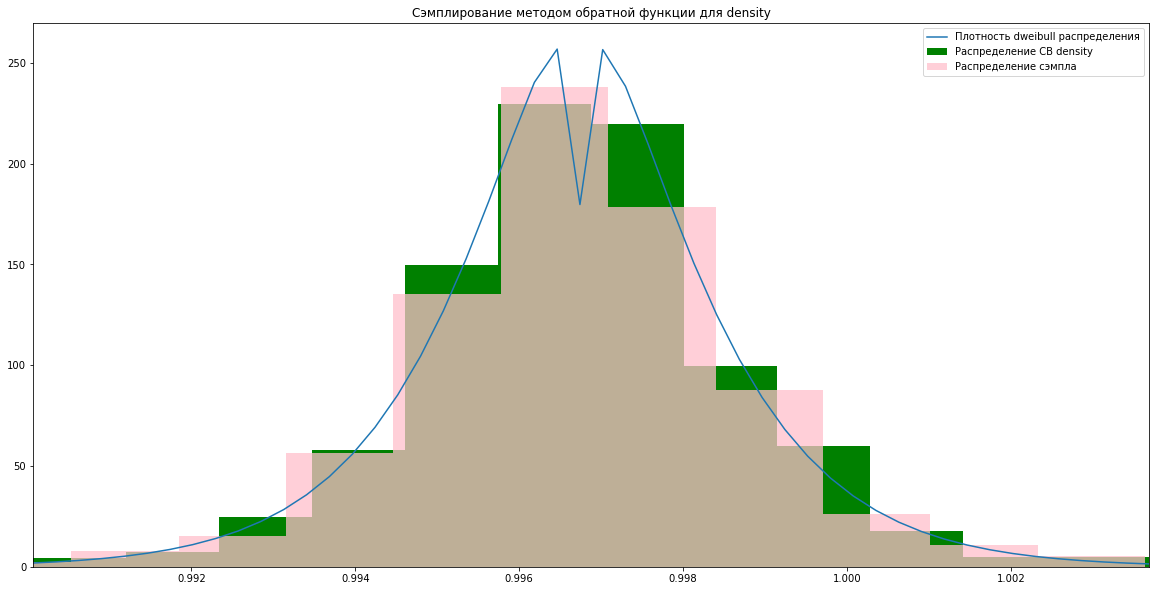

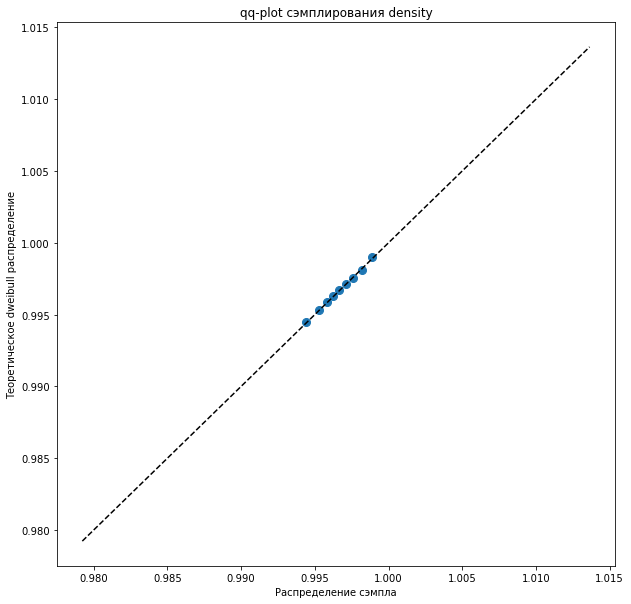

In [483]:
inverse_function_sampling(df, 'density', 'dweibull', (1.1508778162315112, 0.9967306720345006, 0.00150552265956371), 12)
